In [173]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *


#Here we use Feather Data

# In order to work with feather files , do install pyarrow package ..
#  #!pip install pyarrow


In [174]:
!pip install pyarrow

In [175]:
all_data=pd.read_feather("/content/Sales_data.ftr")


# Feather is a binary file format that is used for storing data ..
#Feather is a fast, lightweight, and easy-to-use binary file format for storing data
#It shows high I/O speed, doesn’t take too much memory on the disk and doesn’t need any unpacking
#when loaded back into RAM,Feather has max I/O speed

In [176]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [177]:
all_data.shape

(186850, 6)

#The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc

#**Data Cleaning and Preprocessing**


#Checking out total missing values we have

In [178]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#Since there 545 observations where entire row have missing value , we have to drop these 545 rows

In [179]:
all_data=all_data.dropna()

In [180]:
all_data.shape

(186305, 6)

In [181]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#Check whether We have duplicate rows or not !

In [182]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


# Total 618 duplicate rows ..

# Dropping all the duplicate rows..

In [183]:
data=all_data.drop_duplicates()

In [184]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#                * **Data Analysis* * *

#**1.Which is the best month for sale ?**

"Lets first understand what this term 'best' is all about : if any month has maximum sales, we will consider that as best month."



In [185]:
data[:1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


#Extracting "Month" from "Order Date"

In [186]:
data["Order Date"][0].split("/")[0]

'04'

In [187]:
def to_month(x):
  return x.split("/")[0]


# Applying return_month function on top of "Order Date" feature

In [188]:
data["Month"]=data["Order Date"].apply(to_month)

<ipython-input-188-60fb137151d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"]=data["Order Date"].apply(to_month)


In [189]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
 6   Month             185687 non-null  object
dtypes: object(7)
memory usage: 15.4+ MB


# convert data-type into integer ..

In [191]:
# data["Month"].astype(int)

In [192]:
data["Month"].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [193]:
# we find that,here "Order Date" is one of the Unique value,
# For this we can't change the type of "Month " as int.
# so,at first we remove all the rows contain 'Order Date' as value of "Month" column.

In [194]:
filter1 = data['Month'] == 'Order Date'
filter1

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Month, Length: 185687, dtype: bool

In [195]:
data = data[~filter1]
##...excluding all those rows which have entry as "Order Date" in month feature ..

In [196]:
data["Month"]=data["Month"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
 6   Month             185686 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 11.3+ MB


<ipython-input-196-d25dc2d79dc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"]=data["Month"].astype(int)


In [197]:
data["Month"].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [198]:
data["Quantity Ordered"]=data["Quantity Ordered"].astype(int)
data["Price Each"]=data["Price Each"].astype(float)

# creating sales feature

In [199]:
data["Sales Value"]=data["Quantity Ordered"]*data["Price Each"]

In [200]:
data[:1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9


In [201]:
month_data=data.groupby(["Month"])["Sales Value"].sum()
month_data

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales Value, dtype: float64

<Axes: xlabel='Month'>

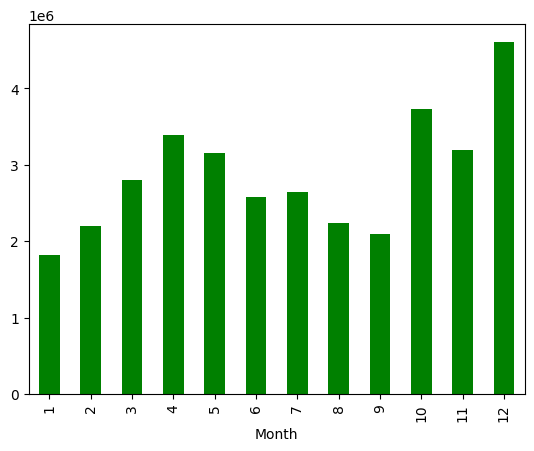

In [202]:
month_data.plot(kind="bar",color="g")




#->> y-axis scale : 1e^6

#e stands for exponential , in short it is *10^

#So, 1e6 or 1e^6 OR 1 exponent 6 is the same as 1*10^6 which is same as 1,000,000


#Inference : December is the best month of sales ..








# **2.From Which city  maximum number of  order placed ?**

In [203]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [204]:
data["Purchase Address"][0]

'917 1st St, Dallas, TX 75001'

In [205]:
data["Purchase Address"][0].split(",")[1]

' Dallas'

# Spliting "Purchase Address" colume and find city name,then store it into a new column named "City"

In [206]:
data["City"]=data["Purchase Address"].str.split(",").str.get(1)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


# Makeing frequency table..

In [207]:
data["City"].value_counts()

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

# Pandas Pie Chart

<Axes: title={'center': 'City Wise Data'}, ylabel='City'>

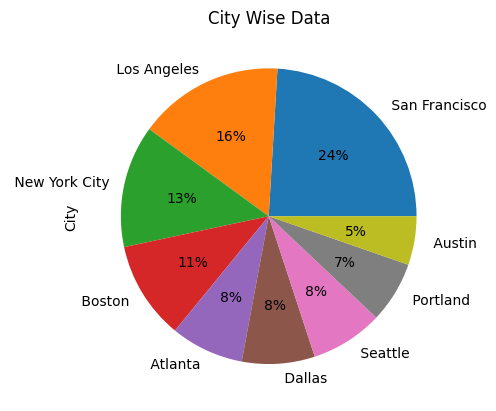

In [208]:
data["City"].value_counts().plot(kind="pie",autopct='%1.0f%%',title="City Wise Data")

# Inference : San Francisco , New York , Los Angeles are the top 3 cities From which  maximum number of  order Placed.

# **3.Which product sold the most & why?**

In [209]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales Value', 'City'],
      dtype='object')

In [210]:
group_data=data.groupby(["Product"]).agg({'Quantity Ordered':"sum",'Price Each':"mean"}).reset_index()


In [211]:
group_data

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [212]:
Products = group_data['Product'].unique()

#When we say twin axes, it means a figure can have dual x or y-axes..
#plt.twinx() : function which is used to create a twin Axes that are sharing the x-axis..

#Similarly, the function plt.twiny() is used to create a second y axis in our figure, which means twiny() sharing the y-axis..

<ipython-input-213-fca1517cc007>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Products, rotation='vertical' , fontsize=8 )


Text(0, 0.5, 'Avg price($) of product')

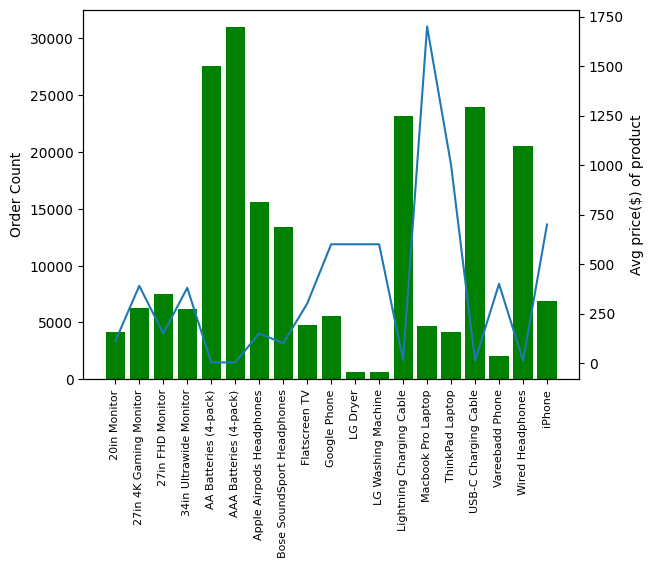

In [213]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx() ## as X-axis is same for both plots , ie we are sharing x-axis , so we have to use ax2 = ax1.twinx()

ax1.bar(group_data['Product'] , group_data['Quantity Ordered'] , color='g')
ax2.plot(group_data['Product'] , group_data['Price Each'] )
ax1.set_xticklabels(Products, rotation='vertical' , fontsize=8 )

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price($) of product')


#Insights :

#The top selling product is 'AAA Batteries'.
#The top selling products seems to have a correlation with the price of the product.
#The cheaper the product higher the quantity ordered and vice versa.


# **4.Understanding Trend of sales of the most sold product ?**

# Finding Top 5 most sold products ..

In [214]:
data["Product"].value_counts()[:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [215]:
most_sold_product=data["Product"].value_counts()[:5].index

In [216]:
# data of Top 5 most sold products only ..

In [217]:
most_sold_product_df=data[data["Product"].isin(most_sold_product)]
most_sold_product_df[:5]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [218]:
most_sold_product_df.groupby(["Month","Product"]).size()


Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

#Makeing Pivot Table using groupby() + unstack()

In [219]:
pivot_table=most_sold_product_df.groupby(["Month","Product"]).size().unstack()
pivot_table

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


Text(0, 0.5, 'Count')

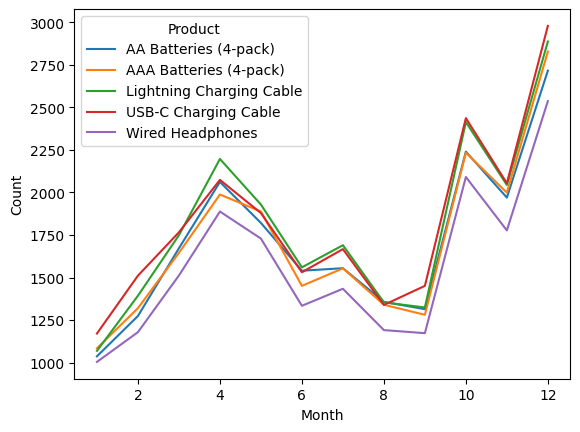

In [220]:
pivot_table.plot()
plt.ylabel("Count")

#Inference : Products have been sold more in October , November , December month,,And some Products have been sold in April month also.

#**5.Which products are most often sold together ?**

keep orders that have same order Id, are sold mostly together ..
    for this we have to keeping duplicated data

In [221]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales Value', 'City'],
      dtype='object')

In [222]:
data["Order ID"]

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

#Dataframe in which we have those Order Ids who have purchased more products !

In [223]:
duplicate_data=data[data["Order ID"].duplicated(keep=False)]
duplicate_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


## For every Order-Id , collecting all the products .

In [224]:
duplicate_products=duplicate_data.groupby(["Order ID"])["Product"].apply(lambda x:",".join(x)).reset_index().rename(columns={"Product":"Groupby Product"})


In [225]:
duplicate_products

,Order ID,Groupby Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


## merge dataframes

In [226]:
duplicate_product_data=duplicate_data.merge(duplicate_products,how="left",on='Order ID')
duplicate_product_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value,City,Groupby Product
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [227]:
# lets drop out all duplicate Order ID

In [228]:
duplicate_product_data.drop_duplicates(subset=['Order ID'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value,City,Groupby Product
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


Text(0, 0.5, 'Groupby Product')

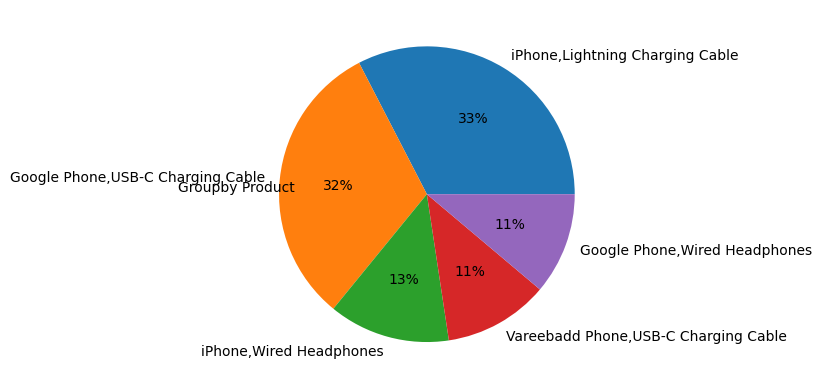

In [229]:
duplicate_product_data["Groupby Product"].value_counts()[:5].plot(kind="pie",autopct='%1.0f%%')
plt.ylabel('Groupby Product',rotation='horizontal')

#Inference: Most selling Groupby product is Iphone with Lightning Charging Cable

#**Recomendation**
#1.As soon as any Person will bought Iphone , we can recommend him/her Lightning charging cable , wired headphones.
#2. As soon as any Person will bought Google phone , we can recommend him/her USB-c charging cable,wired headphones.
#3. As soon as any Person will bought Vareebadd phone , we can recommend him/her USB-c charging cable only.


